## Modelisation with SegFormer

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config_resized

# config["use_saved_model_path"] = "./model_v4_full_cat_8.h5"
config["val_sample_nb"] = 100
config["train_sample_nb"] = 400
config["width"] = 512
config["height"] = 256
config["epoch"] = 4

n = NotebookProcessor(config)

{
    "width": 512,
    "height": 256,
    "classes": 8,
    "epoch": 4,
    "batch_size": 3,
    "learning_rate": 0.001,
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine"
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 500 to 100.


2024-02-27 12:16:51.969784: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-27 12:16:51.969801: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-02-27 12:16:51.969805: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-02-27 12:16:51.969838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-27 12:16:51.969853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model definition

UNET is lorem ipsum

## Model usage

In [9]:
checkpoint = "facebook/sam-vit-base"
mask_generator = pipeline(model=checkpoint, task="mask-generation")

In [7]:
def display_images_with_masks(image_path):
    image = Image.open(image_path).resize((config["width"],config["height"]))
    masks = mask_generator(image, points_per_batch=128, pred_iou_thresh=0.88)
  
    # masks = mask_generator(image, points_per_batch=128, pred_iou_thresh=0.88)  
    colors = mpl.colormaps['viridis'].with_extremes(under="none", over="none", bad="none") 
      
    num_masks = len(masks["masks"])  
  
    height, width = masks["masks"][0].shape  
    combined_masks = np.zeros((height, width, 4))  
  
    for i, mask in enumerate(masks["masks"]):  
        mask_color = colors(i / num_masks)[:3]  
  
        mask_colored = np.dstack((mask * mask_color[0], mask * mask_color[1], mask * mask_color[2], mask))  
        combined_masks += mask_colored  
  
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))  
  
    # Display original image  
    ax[0].imshow(image)  
    ax[0].set_title("Original Image")  
    ax[0].axis('off')  
  
    # Display combined masks  
    ax[1].imshow(combined_masks)  
    ax[1].set_title("Mask")  
    ax[1].axis('off')  
  
    ax[2].imshow(image)
    ax[2].imshow(combined_masks, cmap='viridis', alpha=0.5)
    ax[2].set_title("Original + Mask Overlay")  
    ax[2].axis('off')  
  
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


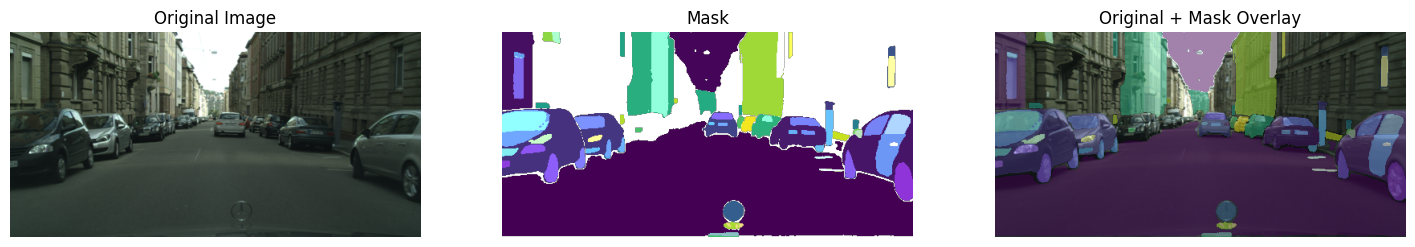

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


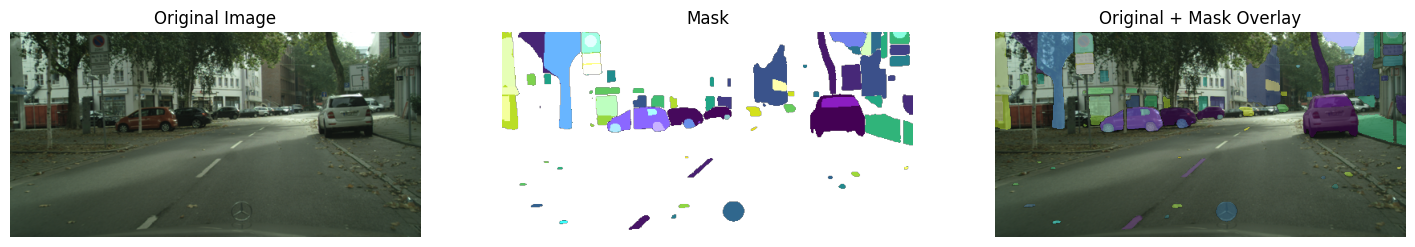

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


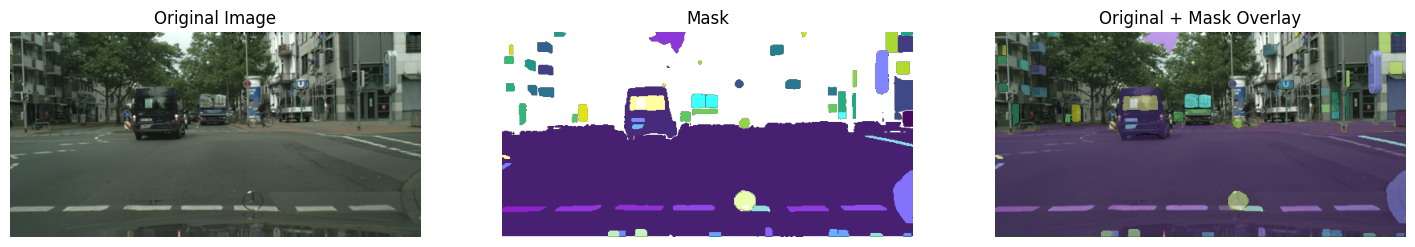

In [4]:
display_images_with_masks(n.img["train"][0])
display_images_with_masks(n.img["train"][1])
display_images_with_masks(n.img["train"][2])